In [1]:
import os
import pandas as pd
import numpy as np

In [ ]:
!! pip install seaborn
# Instalar librería

In [ ]:
!! pip install --upgrade seaborn
# Actualizar librería

In [4]:
import seaborn as sns

In [2]:
# Cargamos base de Salarios
dire= os.getcwd()
salarios= pd.read_csv(dire + '\\BASES\\Salarios.txt', sep=',', 
                        dtype= {'Anio': np.str, 'Codigo_Grupo': np.str,
                                'Codigo_Representante':np.str, 
                                'ID_EMPLEADO':np.str})
salarios[:2]

,Anio,Codigo_Grupo,Grupo,Codigo_Departamento,Departamento,Codigo_Representante,Representante,Codigo_Familia,Familia,Codigo_Trabajo,...,ID_EMPLEADO,Salario_Normal,Tiempo_Extra,Complementos,Total_Salario,Retiro,Beneficio_Dental,Otros_Beneficios,Total_Beneficios,Compensacion_Total
0,2013,01,Public Protection,FIR,FIR Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,Fire Services,H003,...,37216,123841.28,76853.77,14922.05,215617.10,24574.98,14920.13,3589.87,43084.98,258702.08
1,2014,02,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,261,"Laborers, Local 261",7500,Semi-Skilled & General Labor,7514,...,24950,61137.60,7341.04,9218.74,77697.38,14897.71,12516.70,6117.99,33532.40,111229.78


In [3]:
# Un ejercicio con todo lo visto:

# Obtener la media, desviación y conteo x trabajo de los empleados pertenecientes a los 
# 10 trabajos de menor compensación total promedio

In [14]:
## Forma 1
aux= salarios.groupby('Trabajo')[['Compensacion_Total']
                                ].mean().sort_values(['Compensacion_Total'], ascending= True)[:10]

list(aux.index)

,Compensacion_Total
Trabajo,
"Commissioner 16700c, No Pay",-199.960000
"Bdcomm Mbr, Grp2,M=$25/Mtg",314.103978
"BdComm Mbr, Grp4,M=$75/Mtg",489.772000
"Bdcomm Mbr, Grp3,M=$50/Mtg",1003.692113
"Bdcomm Mbr, Grp5,M$100/Mo",1335.589242
"Manager I, MTA",2092.686667
Special Examiner,2193.756387
Commissioner No Benefits,2384.307578
"Manager II, Municipal Transportation Age",3532.761667


In [22]:
## Forma 1
salarios[salarios.Trabajo.isin(list(aux.index))
        ].groupby('Trabajo').aggregate({'Compensacion_Total': {'Promedio': np.mean,
                        'Desviacion': np.std,
                        'Conteo': 'count',
                        'Conteo2': np.count_nonzero}})

Compensacion_Total               \
                                                   Promedio   Desviacion   
Trabajo                                                                    
BdComm Mbr, Grp4,M=$75/Mtg                       489.772000    48.110768   
Bdcomm Mbr, Grp2,M=$25/Mtg                       314.103978   252.826890   
Bdcomm Mbr, Grp3,M=$50/Mtg                      1003.692113  1067.766867   
Bdcomm Mbr, Grp5,M$100/Mo                       1335.589242  6366.580155   
Camp Assistant                                  3608.972627  2330.998004   
Commissioner 16700c, No Pay                     -199.960000          NaN   
Commissioner No Benefits                        2384.307578  2973.730973   
Manager I, MTA                                  2092.686667   880.799096   
Manager II, Municipal Transportation Age        3532.761667  2355.184130   
Special Examiner                                2193.756387  2452.469815   

                                                         
                                         Conteo Conteo2  
Trabajo                                                  
BdComm Mbr, Grp4,M=$75/Mtg                    5     5.0  
Bdcomm Mbr, Grp2,M=$25/Mtg                  186   186.0  
Bdcomm Mbr, Grp3,M=$50/Mtg                  194   194.0  
Bdcomm Mbr, Grp5,M$100/Mo                   277   277.0  
Camp Assistant                              651   651.0  
Commissioner 16700c, No Pay                   1     1.0  
Commissioner No Benefits                    223   223.0  
Manager I, MTA                               12    12.0  
Manager II, Municipal Transportation Age      6     6.0  
Special Examiner                            119   119.0

In [ ]:
## Forma 2
df= salarios.groupby('Trabajo').aggregate(
    {'Compensacion_Total': {'Promedio': np.mean,
                            'Desviacion': np.std,
                            'Conteo': 'count',
                            'Conteo2': np.count_nonzero}})

df= df.sort_values([('Compensacion_Total', 'Promedio')], ascending=True)[:10]

In [40]:
## Como trabajar con doble columna
df= salarios.groupby('Trabajo').aggregate(
    {'Compensacion_Total': {'Promedio': np.mean, 'Desviacion': np.std,
                            'Conteo': 'count', 'Conteo2': np.count_nonzero},
    'Total_Salario': {'Promedio': np.mean, 'Desviacion': np.std,
                      'Conteo': 'count', 'Conteo2': np.count_nonzero}})
df

C:\Users\mb83026\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Compensacion_Total                 \
                                                   Promedio     Desviacion   
Trabajo                                                                      
Account Clerk                                  59991.011170   30096.867681   
Accountant I                                   78617.296667   36495.567745   
Accountant II                                  79926.722779   37387.405136   
Accountant II (OCII)                           93060.936667   46787.096920   
Accountant III                                 96714.537366   46329.285818   
Accountant III (OCII)                         103611.903333   49936.410490   
Accountant IV                                 123373.541229   52802.985954   
Accountant Intern                              38392.625150   28494.520256   
Accounting Supervisor (OCII)                  150169.356667   75045.019735   
Acpo,Juvp, Juv Prob (SFERS)                   213699.893333   19140.884034   
Acupuncturist                                 114329.620000    5093.559289   
Adm, SFGH Medical Center                      326842.905000   59556.833649   
Admin Analyst 3                               118225.878889   44065.827458   
Administrative Analyst                         82359.404673   41719.541930   
Administrative Analyst I                       43697.797500   30762.670503   
Administrative Analyst II                      83341.396429   40710.220822   
Administrative Engineer                       165173.955763   56507.389552   
Administrative Services Mgr                   120831.061333   37383.073051   
Administrator, Department Of Public Heal      256576.715000  171607.924187   
Administrator, Retirement Services            230220.616000   44920.110247   
Admission Attendant                            33435.557338   29363.500355   
Agricultural Inspector                         98605.590000    6237.717390   
Airport Communications Disp                   121959.796194   42624.908322   
Airport Economic Planner                      153406.218429   42651.673357   
Airport Electrician                           133595.223333   60090.145160   
Airport Electrician Supervisor                144564.744545   55643.594698   
Airport Emerg Planning Coord                  127518.892143   36425.185074   
Airport Ground Transport Tech                  64749.069444   41086.947885   
Airport Mechanical Maint Sprv                 159336.403333   80914.924557   
Airport Noise Abatement Spec                   86632.526250   41040.713534   
...                                                     ...            ...   
Victim/Witness Investigator 2                  84662.581489   39654.369244   
Victim/Witness Investigator 3                 106239.535366   40946.421294   
Volunteer/Outreach Coord                       77720.807042   36691.045617   
Wastewater Control Inspector                  107024.986222   52387.423383   
Water & Power Maint Sprv 1                    139306.660000   21303.996148   
Water Conservation Admin                      158732.348000   40658.912524   
Water Const&Main Supt                         179769.177500   98957.381960   
Water Meter Repairer                           95836.271935   31559.166108   
Water Meter Shop Supervisor 1                 110599.708000   44197.853922   
Water Operations Analyst                      159962.042778   44019.588065   
Water Quality Tech III                         95604.862857   42028.534231   
Water Qualitytech I/II                         88280.069191   38927.292953   
Water Service Inspector                       129997.076667   33479.054514   
Watershed Forester                            140218.380000   42944.014566   
Watershed Keeper                              100868.317983   19443.894103   
Watershed Keeper Supervisor                   110542.317333   25156.670443   
Watershed Worker (Seasonal)                    10215.943857    8185.646391   
Welder                                        133866.966379   4

In [39]:
df['Total_Salario'][['Promedio']]  # Filtrar columnas en df con doble índice de columna
df[[ ('Total_Salario', 'Promedio'), ('Compensacion_Total', 'Promedio')  ]]

,Total_Salario,Compensacion_Total
,Promedio,Promedio
Trabajo,,
"Commissioner 16700c, No Pay",0.000000,-199.960000
"Bdcomm Mbr, Grp2,M=$25/Mtg",249.556237,314.103978
"BdComm Mbr, Grp4,M=$75/Mtg",420.000000,489.772000
"Bdcomm Mbr, Grp3,M=$50/Mtg",698.994845,1003.692113
"Bdcomm Mbr, Grp5,M$100/Mo",1175.866462,1335.589242
"Manager I, MTA",1535.062500,2092.686667
Special Examiner,1446.068235,2193.756387
Commissioner No Benefits,2008.164574,2384.307578


<br>  
# Análisis de Datos

### Análisis Bivariados

In [5]:
# Cargamos la base "auto"
auto = pd.read_csv(os.getcwd()+"\\BASES\\auto.csv", sep=',', 
                     dtype={'cilindros': np.str, 'anio': np.str, 
                            'origin': np.str}
                  )
auto.head()

,mpg,cilindros,desplazamiento,caballos,peso,aceleracion,anio,origin,nombre
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
# Cargar la base "auto"
auto = pd.read_csv(os.getcwd()+"\\BASES\\auto.csv", sep=',',
                   dtype={'cilindros':np.str, 'anio':np.str, 
                         'origin': np.str}  # caracter= np.str,  entero= np.int,  puntodecimal= np.float 
                  )
auto.head()

,mpg,cilindros,desplazamiento,caballos,peso,aceleracion,anio,origin,nombre
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [51]:
#'caballos'
# Reemplazar los valores extraños de la variable caballos '?' por na's   y despues suatituirlos porla media
#replace('?', )

# 1. Replace '?' por nas
# 2. fillna(caballos_promedio)
   # convertir variable df['col'].astype(tipo_nuevo_de_dato)    

In [59]:
print(auto.shape)
print(auto.replace({'caballos': {'?': np.nan}}
            ).dropna(axis= 0,  how='any').shape)


media_caballos= auto.replace({'caballos': {'?': np.nan}}
                             ).dropna(axis= 0,  how='any').caballos.astype('int').mean()

# op1
auto.replace({'caballos': {'?': np.nan}}, inplace=True)
# op2 
# auto= auto.replace({'caballos': {'?': np.nan}})
auto= auto.fillna({'caballos': media_caballos})

(398, 9)
(392, 9)


In [67]:
auto.caballos= auto.caballos.astype('int')
auto.dtypes

mpg               float64
cilindros          object
desplazamiento    float64
caballos            int32
peso                int64
aceleracion       float64
anio               object
origin             object
nombre             object
dtype: object

In [86]:
# Variable Objetivo - mpg

In [70]:
#for i in range(0,200):
#    if n%2==0
#    lista.append(i)

## Generaci+on de lista con condicionales    
[x for x in range(0,200) if x%2==0]

[0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100,
 102,
 104,
 106,
 108,
 110,
 112,
 114,
 116,
 118,
 120,
 122,
 124,
 126,
 128,
 130,
 132,
 134,
 136,
 138,
 140,
 142,
 144,
 146,
 148,
 150,
 152,
 154,
 156,
 158,
 160,
 162,
 164,
 166,
 168,
 170,
 172,
 174,
 176,
 178,
 180,
 182,
 184,
 186,
 188,
 190,
 192,
 194,
 196,
 198]

In [80]:
dict(auto.dtypes)  ## Diccionario de tipos de datos

{'mpg': dtype('float64'),
 'cilindros': dtype('O'),
 'desplazamiento': dtype('float64'),
 'caballos': dtype('int32'),
 'peso': dtype('int64'),
 'aceleracion': dtype('float64'),
 'anio': dtype('O'),
 'origin': dtype('O'),
 'nombre': dtype('O')}

In [7]:
## General lista de variables categóricas

var_cat= [llave for llave in dict(auto.dtypes) if (dict(auto.dtypes)[llave]=='O') and (not llave in ['anio', 'nombre'])]
var_cat

['cilindros', 'caballos', 'origin']

In [8]:
# Generar lista de variables numéricas
var_num= [llave for llave in dict(auto.dtypes) if (dict(auto.dtypes)[llave]!='O') and (not llave in ['mpg'])]
var_num

['desplazamiento', 'peso', 'aceleracion']

### Primer "vistazo"

In [94]:
import matplotlib.pyplot as plt  # Librería de gráficos de python
import seaborn as sns            # Librería de gráficos (complemento)
sns.set()

### Gráfico de rendijas

- *sns.pairplot(df, height=3, diag_kind= 'hist', kind='scatter', markers='P')*  

**df:** Dataframe con variables numéricas  
**height:** Tamaño del gráfico  
**diag_kind:** Tipo de gráfico en la diagonal {kde, hist}  
**kind:** Tipo de gráfico fuera de la diagonal {scatter, reg} 
**markers:** Marcadores para los "gráficos de puntos"  [Marcadores de Matplotlib](https://matplotlib.org/api/markers_api.html)

In [105]:
var_num.append('mpg')

'mpg'

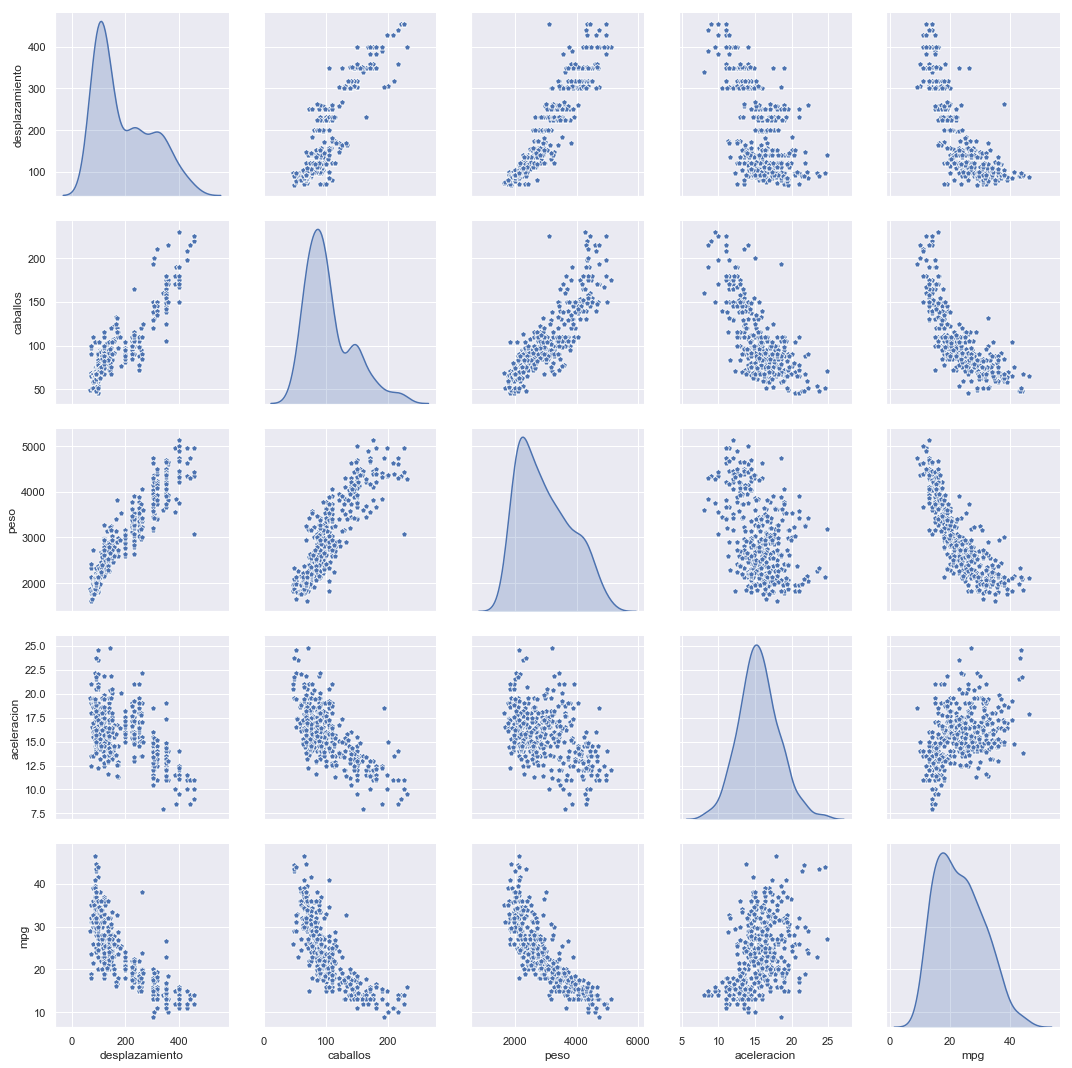

In [112]:
sns.pairplot(auto[var_num], height=3, diag_kind= 'kde', kind='scatter', 
             markers='p')
plt.show()

In [114]:
var_num.pop()
var_num

['desplazamiento', 'caballos', 'peso', 'aceleracion']

## Análisis Bivariados Variable numerica vs numerica

**Coeficiente de Correlación Pearson:** Es el índice que se usa para medir el grado de relación lineal entre dos variables numéricas continuas. Este se mueve entre -1 y 1 donde:

- [-1, 0) Correlación negativa: Cuando una variable crece la otra disminuye
- 0  Correlación nula: No hay relación entre las variables
- (0, 1]  Correlación Positiva: Cuando una variable aumenta la otra también  


<img src="Correlacion.png" />

### Gráfico de puntos

- *sns.scatterplot(x, y, hue, data)*  

**x:** Variable numérica  
**y:** Variable numérica  
**hue:** Variable categórica para colorear de acuerdo a las clases  
**data:** Dataframe de las variables 

In [ ]:
## Buscar si existe alguna relación entre la variable objetivo (mpg) y desplazamiento

In [118]:
# Coeficiente de correlación con Python
auto[['mpg', 'desplazamiento']].corr()

,mpg,desplazamiento
mpg,1.000000,-0.804203
desplazamiento,-0.804203,1.000000


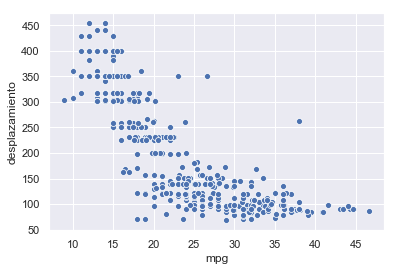

In [120]:
sns.scatterplot(x= 'mpg', y= 'desplazamiento', data= auto)
plt.show()

## Análisis Bivariados Variables Categoricas vs Numéricas

In [9]:
auto['cilindros'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cilindros, dtype: int64

### Cambiar Grupos de una Variable

- *df.replace({ 'variable' : { 'val1' : 'nuevo1', 'val2' : 'nuevo2', 'val3' : 'nuevo3'}}, Inplace)*  

**variable:** Variable categorica del data frame  
**val:** Valor de la variable a reemplazar  
**nuevo:** Valor nuevo  
**Inplace:** True para reemplazar los valores en el df original, False para generar uno nuevo

In [10]:
auto.replace({'cilindros': {'3': '4',
                            '5': '6'}}, inplace=True)

auto.cilindros.value_counts()

4    208
8    103
6     87
Name: cilindros, dtype: int64

### Comparación de Distribuciones

In [11]:
## Creamos un resumen estadístico de mpg para cada tipo de cilindro  
cil= auto.groupby('cilindros')['mpg']
cil.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
cilindros,,,,,,,,
4,208.0,29.12,5.79,18.0,25.0,28.0,32.92,46.6
6,87.0,20.24,4.17,15.0,18.0,19.1,21.00,38.0
8,103.0,14.96,2.84,9.0,13.0,14.0,16.00,26.6


### Gráfico de Distribuciones

- *sns.distplot(df, label, bins, color)*  

**df:** Datframe con los datos a graficar  
**label:** Etiqueta del gráfico  
**bins:** Número de segmentos(barras)
**color:** color del gráfico

In [12]:
sns.distplot(auto[['mpg']], color='blue', label='mpg', bins=20)
plt.show()

NameError: name 'sns' is not defined

In [13]:
plt.figure(figsize=(15,5))           ## Tamaño de gráfico
sns.distplot(auto[auto['cilindros']=='4']['mpg'],color='#446CB7',label='4',bins=10)
sns.distplot(auto[auto['cilindros']=='6']['mpg'],color='#008F7A',label='6',bins=8)
sns.distplot(auto[auto['cilindros']=='8']['mpg'],color='#CF52A0',label='8',bins=10)
plt.title("mpg x Tipo de Cilindro")  ## Título del gráfico
plt.legend()                         ## Agregar cuadro con leyenda
plt.show()                           ## Muestra el gráfico

NameError: name 'plt' is not defined

### Prueba ANOVA

In [14]:
from statsmodels import api as ap
from statsmodels.formula.api import ols

***Análisis de varianza***  

$SS_{total}=SS_{fact}+SS_{error}$

$\sum _{i}\sum _{j}(y_{ij}-{\overline {y}})^{2}= n\sum _{i}(\overline y_{i} - {\overline {y}})^{2}+\sum _{i}\sum _{j}(y_{ij}-y_{i})^{2}$

$x_j   \forall j \in 1,..,n $  
$i:$ *i ésima categoría de la variable*

El anova mide el porcentaje de varianza explicado por la variable categórica, construye un estadistico con distibución F el cual se contrasta en una prueba de hipótesis donde H0: Las medias de los grupos son iguales - lo que indicaría que no hay diferencia entre los grupos. Buscamos rechazar H0 por lo que buscaremos un pi-value bajo.

In [17]:
model_cil= ols('mpg ~ C(cilindros)', data= auto)   # Generamos un modelo lineal entre mpg y cilindros
model_ajust= model_cil.fit()                       # Ajustamos el modelo
anova_cil_t1= ap.stats.anova_lm(model_ajust, typ=1)   # Calculamos el test anova
anova_cil_t2= ap.stats.anova_lm(model_ajust, typ=2)   # Calculamos el test anova
anova_cil_t3= ap.stats.anova_lm(model_ajust, typ=3)   # Calculamos el test anova

print('\nANOVA Tipo 1')
print(anova_cil_t1.round(2))
print('\nANOVA Tipo 2')
print(anova_cil_t2.round(2))
print('\nANOVA Tipo 3')
print(anova_cil_t3.round(2))

## El pi-value es menor al 5% por lo tanto se rechaza que las medias sean iguales
## Podemos decir que la variable de cilindros nos ayuda a predecir las mpg


ANOVA Tipo 1
                 df    sum_sq  mean_sq       F  PR(>F)
C(cilindros)    2.0  14997.51  7498.75  320.04     0.0
Residual      395.0   9255.07    23.43     NaN     NaN

ANOVA Tipo 2
                sum_sq     df       F  PR(>F)
C(cilindros)  14997.51    2.0  320.04     0.0
Residual       9255.07  395.0     NaN     NaN

ANOVA Tipo 3
                 sum_sq     df        F  PR(>F)
Intercept     176363.53    1.0  7527.08     0.0
C(cilindros)   14997.51    2.0   320.04     0.0
Residual        9255.07  395.0      NaN     NaN


In [ ]:
plt.figure()
sns.catplot(x="cilindros", y="mpg", kind="box", data=auto) # kind='swarm', 'box','bar', 'boxen'
plt.title('mpg x Cilindros')
plt.show()  # Elimina los comentarios de matplotlib

<Figure size 432x288 with 0 Axes>

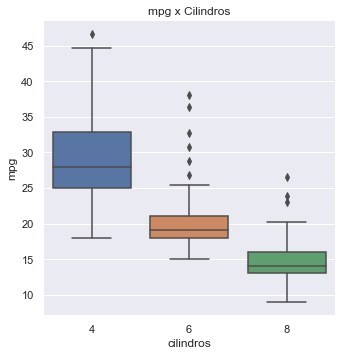

In [142]:
## Comparar distribuciones
plt.figure()
sns.catplot(x="cilindros", y="mpg",  kind="box",  data=auto) # kind='swarm', 'box','bar', 'boxen'
plt.title('mpg x Cilindros')
plt.show()  # Elimina los comentarios de matplotlib

## TEST DE BONDAD DE AJUSTE Y PRUEBAS DE NORMALIDAD

In [49]:
## Prueba de Ajuste Kolmogorov-Smirnov  H0: Ambas muestras tienen la misma distribución

from scipy.stats import kstest
from scipy import stats

# Sembramos una semilla aleatoria para que veamos la misma muestra aleatoria y resultados
np.random.seed(50) 

## Generamos una muestra con distribución normal
x= stats.norm.rvs(size=1000)

## Generamos test para muestra con distribución normal
print('Prueba para distribución Normal')
stats.kstest(x, 'norm')   # Pi value > 5%  ->  Se acepta que la muestra se distribuye normal
print(stats.kstest(x, 'norm'))

## Generamos test para muestra con ditribución exponencial
print('\nPrueba para distribución Exponencial')
stats.kstest(x, 'expon')   # Pi value <= 5%  ->  Se rechaza que la muestra se distribuye exponencial
print(stats.kstest(x, 'expon'))

Prueba para distribución Normal
KstestResult(statistic=0.01897284696626378, pvalue=0.864317070510578)

Prueba para distribución Exponencial
KstestResult(statistic=0.509, pvalue=1.0145713938877597e-240)


[Mas distribuciones](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)

In [61]:
## Test específicos de Normalidad
import pandas as pd

# Sembramos una semilla aleatoria para que veamos la misma muestra aleatoria y resultados
np.random.seed(100) 

# Generamos una muestra con distribucion normal y otra con distribución gamma(l=2)
x = stats.norm.rvs(size=1000)  # Normal
y = stats.gamma.rvs(2, size=1000)

## Test Shapiro-Wilk  H0: La muestra tiene distribución normal
from scipy.stats import shapiro
print('\nTest de normalidad para muestra normal')  # Pi value > 5% -> Se acepta la normalidad
print(shapiro(x))
print('\nTest de normalidad para muestra gamma')   # Pi value <= 5% -> Se rechaza la normalidad
print(shapiro(y))

## Test Anderson-Darling  H0: La muestra tiene distribución normal
from scipy.stats import anderson

print('\nTest de normalidad para muestra normal')
print(pd.DataFrame(anderson(x, 'norm'), ['Estadístico', 'Valor_Crítico', 'NivelSignificancia'])) 
# El estadístico es menor a todos los valores críticos por lo que se acepta la normalidad a todos los niveles de confianza

print('\nTest de normalidad para muestra gamma')
print(pd.DataFrame(anderson(y, 'norm'), ['Estadístico', 'Valor_Crítico', 'NivelSignificancia']))
# El estadístico es mayor a todos los valores críticos por lo que se rechaza la normalidad a todos los niveles de confianza


Test de normalidad para muestra normal
(0.9980061054229736, 0.2852003872394562)

Test de normalidad para muestra gamma
(0.9102035760879517, 7.908534889815096e-24)

Test de normalidad para muestra normal
                                                      0
Estadístico                                    0.278552
Valor_Crítico       [0.574, 0.653, 0.784, 0.914, 1.088]
NivelSignificancia          [15.0, 10.0, 5.0, 2.5, 1.0]

Test de normalidad para muestra gamma
                                                      0
Estadístico                                     21.5422
Valor_Crítico       [0.574, 0.653, 0.784, 0.914, 1.088]
NivelSignificancia          [15.0, 10.0, 5.0, 2.5, 1.0]
